# Final Project 

### Tahnesha Anyik
### What specifications have the greatest influence when determining the price of used cars?

## Relevant regressors are:

##### *Brand*
##### *Mileage*
##### *Year*
##### *Engine Type*
##### *Body Style*

#### Load libraries

In [6]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python3\python.exe -m pip install --upgrade pip' command.


In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python3\python.exe -m pip install --upgrade pip' command.


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python3\python.exe -m pip install --upgrade pip' command.


In [9]:
pip install sklearn-linear-model-modification

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python3\python.exe -m pip install --upgrade pip' command.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

#### import data

In [11]:
usedCar = pd.read_csv("C:/Users/tahne/Desktop/Data Science/Final Project/CarSalesData.csv")
usedCar.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Initial Review

#### *descriptive stats observation*

In [12]:
usedCar.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### *Determine which variables to look at given data*
#### Since Model has 312 unique entries we will drop it. This would mean a lot of dummies in the code.

In [13]:
usedCar1 = usedCar.drop(['Model'], axis =1)

### Missing values

In [14]:
usedCar1.isnull().sum()
# there are 172 null values in price and 150 in Engine V

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

#### * Note: If removing < 5%, you can just remove all that have missing values
##### in this case we have 4.12%  and 3.57% respectively

In [15]:
usedCar2nMv = usedCar1.dropna(axis=0)

In [16]:
usedCar2nMv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [17]:
usedCar2nMv.describe(include='all')
# the mean, as compared to the min and max, seem a bit off for some of the variables.
# I believe this suggests outliers

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Looking at the data- looking for normal distribution

### First up, Price.

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

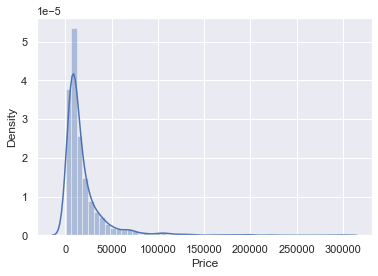

In [18]:
sns.distplot(usedCar2nMv['Price'])
# there is a positive skew to the data.
# we see some outliers here.

### Let's get rid of some of those outliers.
### I will do that by only using the 

In [19]:
print(np.where(usedCar2nMv['Price']>125000))
#showing prices that are above $125000

(array([   5,   56,  118,  160,  201,  321,  406,  551,  557,  786,  921,
       1212, 1327, 1524, 1538, 1599, 1619, 1741, 1768, 1860, 1882, 1972,
       2022, 2043, 2046, 2058, 2075, 2332, 2356, 2454, 2536, 2919, 2922,
       2994, 3037, 3075, 3364, 3373, 3637, 3749, 3800, 3947, 3999],
      dtype=int64),)


### Getting rid of the outliers
#### I went with values less than 125,000 dollars

In [20]:
o = usedCar2nMv['Price']<125000
usedCar3 = usedCar2nMv[o]
usedCar3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3978,3978.000000,3978,3978.000000,3978.000000,3978,3978,3978.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1522,NaN,NaN,1848,3607,NaN
mean,NaN,17674.171433,NaN,165.345902,2.742881,NaN,NaN,2006.279789
std,NaN,18520.363729,NaN,102.673248,4.959657,NaN,NaN,6.669156
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6950.000000,NaN,93.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [21]:
usedCar3.isnull().sum()
# making sure still good on NAs

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

### Looking at revised graph

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

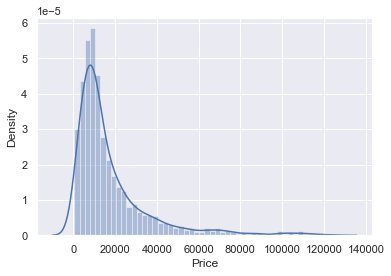

In [22]:
sns.distplot(usedCar3['Price'])
#looks better. Might consider sqrt function to get it closer to normal

#### Let's look at mileage

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

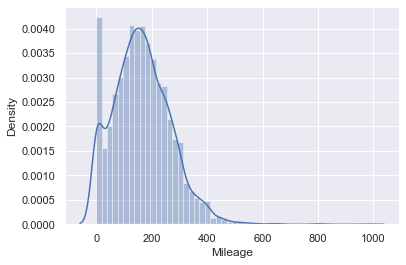

In [23]:
sns.distplot(usedCar3['Mileage'])
#looks decent; however, there is an outlier
# I think I want to eliminate 0. A used car had to be driven somewhere.

In [24]:
r = usedCar3['Mileage']>= 1
p = usedCar3['Mileage']<601
usedCar4 = usedCar3[r][p]
usedCar4.describe(include='all')

C:\Users\tahne\AppData\Local\Temp\ipykernel_18424\3425796956.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  usedCar4 = usedCar3[r][p]


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3844,3844.000000,3844,3844.000000,3844.000000,3844,3844,3844.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,852,NaN,1493,NaN,NaN,1752,3473,NaN
mean,NaN,16229.547393,NaN,169.933923,2.754753,NaN,NaN,2005.960978
std,NaN,15865.001016,NaN,97.023985,5.042840,NaN,NaN,6.542922
min,NaN,600.000000,NaN,1.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6800.000000,NaN,100.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10950.000000,NaN,161.500000,2.200000,NaN,NaN,2007.000000
75%,NaN,19996.000000,NaN,233.000000,3.000000,NaN,NaN,2011.000000


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

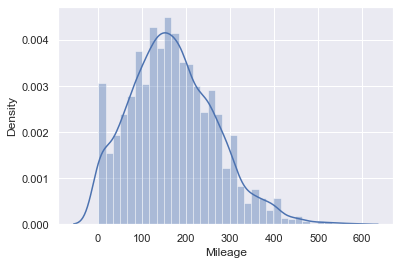

In [25]:
sns.distplot(usedCar4['Mileage'])
#ok. looks good. looking at data with a mileage between 1 and 600. 

#### Now, Engine.
##### The largest engine volume I found was 9.3 L engine from Chevy. So, everything above 9.3 will be discarded.
#### Upon further testing we will get rid of everything below 6.3

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

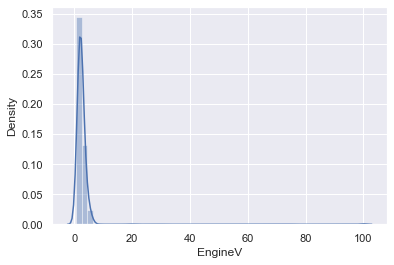

In [26]:
sns.distplot(usedCar4['EngineV'])

In [27]:
e = usedCar4['EngineV']<=6.3
usedCar5 = usedCar4[e]
usedCar5.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3821,3821.000000,3821,3821.000000,3821.000000,3821,3821,3821.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,847,NaN,1481,NaN,NaN,1745,3456,NaN
mean,NaN,16275.256263,NaN,169.775190,2.442722,NaN,NaN,2005.974876
std,NaN,15890.831781,NaN,97.087883,0.949184,NaN,NaN,6.543483
min,NaN,600.000000,NaN,1.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,100.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10999.000000,NaN,161.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,19999.000000,NaN,232.000000,3.000000,NaN,NaN,2011.000000


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

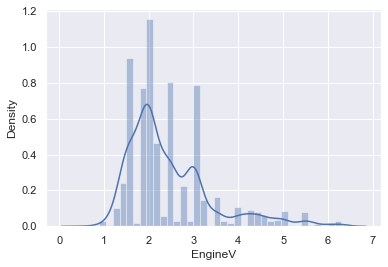

In [28]:
sns.distplot(usedCar5['EngineV'])
# looks better

#### Now, Year

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

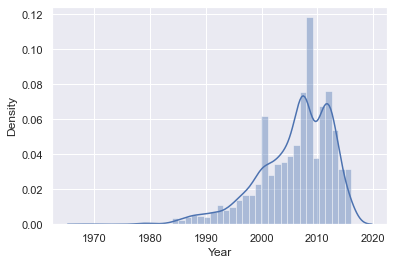

In [29]:
sns.distplot(usedCar5['Year'])
#negatively skewed. might consider trying the cube function
# there seems to be a spike in the number of cars available that are between the years 2008-2010 and then again around 2011-2013
# I will used the percentile method year to get closer to normality

In [30]:
b = usedCar5['Year'].quantile(0.01)#removing the 1st percentile
usedCar6 = usedCar5[usedCar5['Year']>b]

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

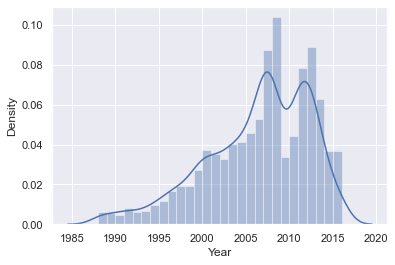

In [31]:
sns.distplot(usedCar6['Year'])
#still skewed, but looks better

In [32]:
uCar_clean = usedCar6.reset_index(drop=True)

In [33]:
uCar_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3765,3765.000000,3765,3765.000000,3765.000000,3765,3765,3765.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,833,NaN,1447,NaN,NaN,1734,3400,NaN
mean,NaN,16468.782027,NaN,168.988313,2.450077,NaN,NaN,2006.293758
std,NaN,15918.968334,NaN,96.522907,0.952671,NaN,NaN,6.028869
min,NaN,800.000000,NaN,1.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7000.000000,NaN,100.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11100.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20100.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


## Checking Assumptions!

### Scatterplot to find linear relationship

Text(0.5, 1.0, 'Price and Mileage')

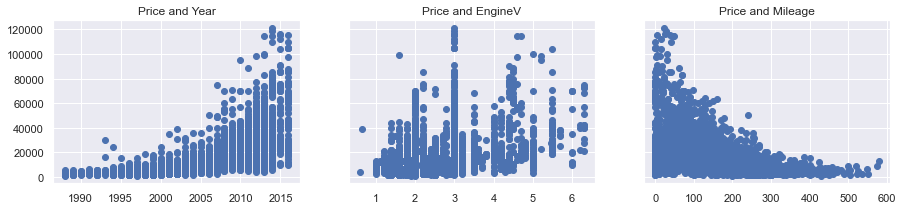

In [34]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter (uCar_clean['Year'], uCar_clean['Price'])
ax1.set_title('Price and Year')
ax2.scatter (uCar_clean['EngineV'], uCar_clean['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter (uCar_clean['Mileage'], uCar_clean['Price'])
ax3.set_title('Price and Mileage')

##### No clear linear relationship is seen. Let's work with the data.

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

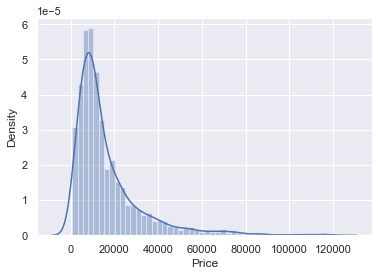

In [35]:
sns.distplot(uCar_clean['Price'])
#not normally distributed-- positively skewed. let's use the sq rt function. 
# In R, log looks like too much. Let's see what we get here

In [36]:
sqrtPrice = np.sqrt(uCar_clean['Price'])
uCar_clean['sqrtPrice']= sqrtPrice
uCar_clean

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,sqrtPrice
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,64.807407
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,88.881944
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,115.325626
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,151.657509
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,135.277493
...,...,...,...,...,...,...,...,...,...
3760,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,82.462113
3761,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,107.238053
3762,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,133.790882
3763,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,80.622577


Text(0.5, 1.0, 'Price and Mileage')

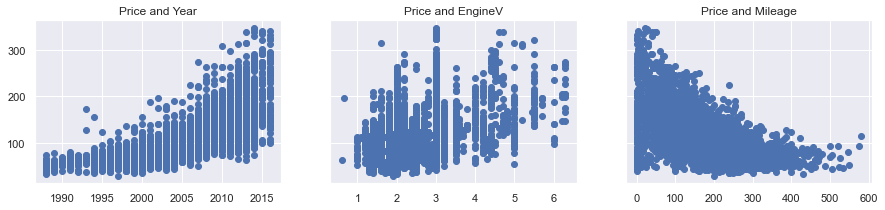

In [37]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter (uCar_clean['Year'], uCar_clean['sqrtPrice'])
ax1.set_title('Price and Year')
ax2.scatter (uCar_clean['EngineV'], uCar_clean['sqrtPrice'])
ax2.set_title('Price and EngineV')
ax3.scatter (uCar_clean['Mileage'], uCar_clean['sqrtPrice'])
ax3.set_title('Price and Mileage')
# It could be better
## We will try log next and compare

In [38]:
logPrice = np.log(uCar_clean['Price'])
uCar_clean['logPrice']=logPrice
uCar_clean

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,sqrtPrice,logPrice
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,64.807407,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,88.881944,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,115.325626,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,151.657509,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,135.277493,9.814656
...,...,...,...,...,...,...,...,...,...,...
3760,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,82.462113,8.824678
3761,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,107.238053,9.350102
3762,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,133.790882,9.792556
3763,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,80.622577,8.779557


Text(0.5, 1.0, 'Price and Mileage')

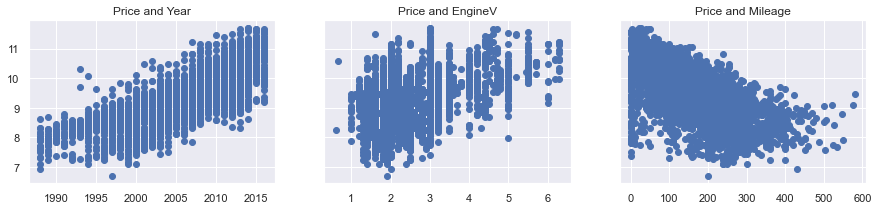

In [39]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter (uCar_clean['Year'], uCar_clean['logPrice'])
ax1.set_title('Price and Year')
ax2.scatter (uCar_clean['EngineV'], uCar_clean['logPrice'])
ax2.set_title('Price and EngineV')
ax3.scatter (uCar_clean['Mileage'], uCar_clean['logPrice'])
ax3.set_title('Price and Mileage')


### Will use the log function because of Price and EngineV plot. 
### The other plots seem to show a good linear relationship in the sqrt function.

In [40]:
uCar_clean1= uCar_clean.drop(['Price'], axis=1)

In [41]:
uCar_clean1= uCar_clean1.drop(['sqrtPrice'], axis=1)
## Now only has the logPrice column

In [42]:
uCar_clean1

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,logPrice
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3760,Renault,sedan,152,1.6,Petrol,yes,2007,8.824678
3761,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3762,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3763,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


## Test for Multicollinearity 

In [43]:
uCar_clean1.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'logPrice'], dtype=object)

### Year and Mileage are correlated--- the lower the year, the lower the miles
### Variance inflation factor estimates how much larger the sqrt of the std error is.
#### when significant issues exist the VIF will be high. 
##### VIF = 1 no corr, 1 < VIF <5 mod corr, and VIF> 5 high corr

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
variables = uCar_clean1[['Mileage', 'Year', 'EngineV']] ## checking for multicollonearity between these variables
vif = pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(variables.values,  i) for i in range(variables.shape[1])]
vif["features"]= variables.columns
vif

,VIF,features
0,4.036557,Mileage
1,10.606078,Year
2,7.613726,EngineV


### This shows us that mileage has a moderate correlation to the model, while Year and EngineV have a high coorelation to the model

### Upon further research, it was that a VIF over 10 is said to be to high. So, I will drop Year and keep Mileage and Year

In [46]:
uCarNoMlt_clean2 = uCar_clean1.drop(['Year'], axis = 1)

In [47]:
uCarNoMlt_clean2

,Brand,Body,Mileage,EngineV,Engine Type,Registration,logPrice
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3760,Renault,sedan,152,1.6,Petrol,yes,8.824678
3761,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3762,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3763,BMW,sedan,1,3.5,Petrol,yes,8.779557


### Create dummy variables

In [48]:
# use get_dummies in pandas
uCarwDum = pd.get_dummies (uCarNoMlt_clean2, drop_first = True)

In [49]:
uCarwDum.head()

,Mileage,EngineV,logPrice,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange the columns

In [50]:
uCarwDum.columns.values

array(['Mileage', 'EngineV', 'logPrice', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [51]:
cols = [ 'logPrice','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [52]:
uCarPre = uCarwDum[cols]
uCarPre

,logPrice,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3760,8.824678,152,1.6,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
3761,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3762,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3763,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


### Linear Regression Model

#### Inputs and target

In [53]:
target= uCarPre['logPrice']
input = uCarPre.drop(['logPrice'], axis=1)

#### scale the data

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(input)

StandardScaler()

In [55]:
inputScaled = scaler.transform(input)#proceed with caution, not common to standardize dummies 

#### Train Test Split

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (inputScaled, target, test_size=0.2,random_state=365)

#### Create regression

In [57]:
reg= LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [58]:
#plot predicted vals against observed
y_hat = reg.predict(x_train)

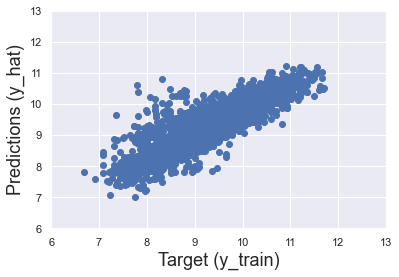

In [59]:
plt.scatter(y_train, y_hat) ## the observed and predicted targets
plt.xlabel('Target (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

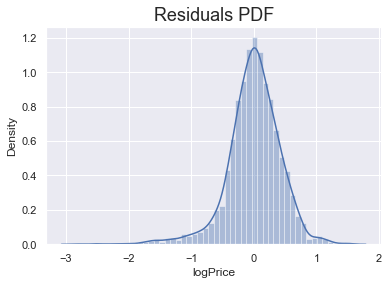

In [60]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size = 18)

### The results look normally distributed.
### However, therr is a much longer tail on the negative side. 
### Therefore, implying a much higher price is predicted than is observed.

### Finally, calculate R-Squared.

In [61]:
reg.score(x_train, y_train)

0.7356166757433151

### The model is explaining around 74% of the variablity of the data.
#### This is a decent result

### Finding weights and bias

In [62]:
reg.coef_ #weights

array([-0.42811046,  0.21575754,  0.01715593,  0.00425884, -0.13518366,
       -0.17562817, -0.04628742, -0.08607452, -0.1401223 , -0.08919056,
       -0.18739045, -0.11790668, -0.15141552, -0.12305791, -0.03507348,
       -0.14367296,  0.32277854])

#### create a summary table

In [63]:
reg_summary = pd.DataFrame(input.columns.values, columns=['Features'])
reg_summary['Weights']= reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.428110
1,EngineV,0.215758
2,Brand_BMW,0.017156
3,Brand_Mercedes-Benz,0.004259
4,Brand_Mitsubishi,-0.135184
5,Brand_Renault,-0.175628
6,Brand_Toyota,-0.046287
7,Brand_Volkswagen,-0.086075
8,Body_hatch,-0.140122
9,Body_other,-0.089191


### Weights interpretation
1. A positive weight shows a directly proportional relationship. 
> As the feature increases, so does the logPrice and the Price.
2. A negatitive weight shows a indirectly proportional relationship. 
> As the feature increases, the logPrice and the Price decreases.
3. Dummy variables. 
> A positive weight shows that the brand is more expensive (than Audi).
A negative weight shows that the brand is less expensive(than Audi).
Audi is the baseline, because it has been dropped(in summary table).



In [64]:
uCar_clean1['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

### Testing

In [65]:
# testing model performance
y_hat_test = reg.predict(x_test) 

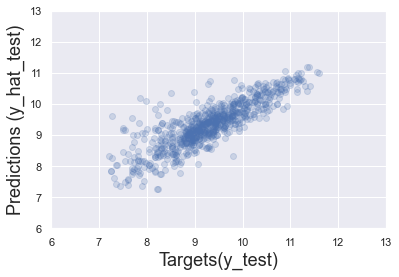

In [66]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets(y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

### The model is better at predicting higher prices than lower prices.

In [67]:
dfPf = pd.DataFrame(np.exp(y_hat_test), columns= ['Predictions'])
dfPf.head()

,Predictions
0,16666.005391
1,20102.414765
2,4406.239303
3,7591.184559
4,6675.126741


In [68]:
dfPf['Target']= np.exp(y_test)
dfPf.head()

,Predictions,Target
0,16666.005391,NaN
1,20102.414765,7900.0
2,4406.239303,NaN
3,7591.184559,NaN
4,6675.126741,NaN


In [69]:
y_test = y_test.reset_index(drop=True) 
# this will reset the index of y_test and will take care of the missing values

In [70]:
y_test.head()

0    9.898475
1    9.433484
2    8.517193
3    8.411833
4    8.909235
Name: logPrice, dtype: float64

In [71]:
dfPf['Target']= np.exp(y_test)
dfPf

,Predictions,Target
0,16666.005391,19900.0
1,20102.414765,12500.0
2,4406.239303,5000.0
3,7591.184559,4500.0
4,6675.126741,7400.0
...,...,...
748,10680.650018,16500.0
749,12277.998526,5700.0
750,11661.743901,7900.0
751,5376.289675,5000.0


In [72]:
dfPf['Residual']= dfPf['Target'] - dfPf['Predictions']

In [73]:
dfPf['Difference%'] = np.absolute(dfPf['Residual']/dfPf['Target']*100)
dfPf

,Predictions,Target,Residual,Difference%
0,16666.005391,19900.0,3233.994609,16.251229
1,20102.414765,12500.0,-7602.414765,60.819318
2,4406.239303,5000.0,593.760697,11.875214
3,7591.184559,4500.0,-3091.184559,68.692990
4,6675.126741,7400.0,724.873259,9.795585
...,...,...,...,...
748,10680.650018,16500.0,5819.349982,35.268788
749,12277.998526,5700.0,-6577.998526,115.403483
750,11661.743901,7900.0,-3761.743901,47.617011
751,5376.289675,5000.0,-376.289675,7.525793


In [74]:
dfPf.describe()

,Predictions,Target,Residual,Difference%
count,753.000000,753.000000,753.000000,753.000000
mean,14697.477314,15757.952935,1060.475621,42.066793
std,11404.051973,15667.977336,8176.476335,79.213690
min,1395.475624,1350.000000,-35253.988542,0.051123
25%,7294.396679,6650.000000,-2272.474262,11.445770
50%,11385.760098,10600.000000,-18.803245,23.110117
75%,17894.849165,18500.000000,2790.785157,41.035823
max,71832.627920,109999.000000,51942.936870,922.739994
